In [1]:
# execute to import notebook styling for tables and width etc.
from IPython.core.display import HTML
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from scipy.optimize import minimize_scalar
from pyomo.environ import *
response = urllib.request.urlopen('https://raw.githubusercontent.com/DataScienceUWL/DS775v2/master/ds755.css')
HTML(response.read().decode("utf-8"));

<font size=18>Lesson 08 Homework</font>

# **HW8.1** - Textbook Problem 20.1-2

The weather can be considered a stochastic system, because it evolves in a probabilistic manner from one day to the next. Suppose for a certain location that this probabilistic series satisfies the following description:

The probability of rain tomorrow is 0.6 if it is raining today. The probability of its being clear (no rain) tomorrow is 0.8 if it is clear today.

We've modified the problem a bit from the text book:  use uniformly distributed random numbers to simulate a sequence of 1000 days starting from a clear day.  Your code should output the the approximate probability of a rainy day based on your simulation results.

<font color = "blue"> *** 6 points -  answer in cell below *** (don't delete this cell) </font>

In [2]:
#np.random.seed(seed=885)

# set up
size = 1000
today = 'clear'
rainy_days = 0
clear_days = 0
    
# simulation
for i in range(size):
    rand = np.random.uniform(low=0.0, high=1.0, size=1)
    if today == 'clear':
        if rand > 0.8:
            today = 'rainy'
            rainy_days += 1
        else:
            today = 'clear'
            clear_days += 1
    elif today == 'rainy':
        if rand <= 0.6:
            today = 'rainy'
            rainy_days += 1
        else:
            today = 'clear'
            clear_days += 1
            
total_days = clear_days+rainy_days # should = size, but while testing...

# output
print(f"Over {total_days} days:")
print("Clear days: ",clear_days)
print("Rainy days: ",rainy_days)
print(f"Approximate probability of rain: {rainy_days/total_days:0.4f}")

Over 1000 days:
Clear days:  626
Rainy days:  374
Approximate probability of rain: 0.3740


# **HW8.2** - Textbook Problem 20.6-7

Now that Jennifer is in middle school, her parents have decided that they really must start saving for her college education. They have $\$10,000$ to invest right now. Furthermore, they plan to save another $\$4,000$ each year until Jennifer starts college five years from now. They plan to split their investment evenly between a stock fund and a bond fund. Historically, the stock fund has had an average annual return of 8 percent with a standard deviation of 6 percent. The bond fund has had an average annual return of 4 percent with a standard deviation of 3 percent. (Assume a normal distribution for both.)
Assume that the initial investment ($\$10,000$) is made right now (year 0) and is split evenly between the two funds (i.e., $\$5,000$ in each fund). The returns of each fund are allowed to accumulate (i.e., are reinvested) in the same fund and no redistribution will be done before Jennifer starts college. Furthermore, four additional investments of $\$4,000$ will be made and split evenly between both funds ($\$2,000$ each) at the end of year 1, year 2, year 3, and year 4, plus another $\$4,000$ of savings will be available at the end of year 5, just in time for Jennifer to begin college. Use a 1000-trial simulation to estimate each of the following.  The diagram below, for one investment, may help you understand the timing of the deposits:

<img src="images/deposits.png" width=600>

**HW8.2a** - What will be the expected value (mean) of the college fund
at the end of year 5?

**HW8.2b** - What will be the standard deviation of the college fund at the
end of year 5?

**HW8.2c** - What is the probability that the college fund at the end of year
5 will be at least \$35,000?

**HW8.2d** - What is the probability that the college fund at the end of year
5 will be at least \$40,000?

You can put all your code in one cell and print out the answers to (a)-(d) in a nicely formatted fashion please.  Your answers should be formatted as currency to the nearest $0.01.

<font color = "blue"> *** 12 points -  answer in cell below *** (don't delete this cell) </font>

In [3]:
# set up
num_sims = 1000
start = 10000 # initial investment
yearly = 4000 # yearly contribution
years = 5 # lifetime of portfolio
stock_avg = .08 # avg return of stocks
stock_dev = .06 # avg std dev of stocks
bond_avg = .04 # avg return of bonds
bond_dev = .03 # avg std dev of bonds

# simulation
fund_value = np.zeros(num_sims)
for i in range(num_sims):
    stocks = start / 2
    bonds = start / 2
    for j in range(years):
        stocks += (np.random.normal(loc=stock_avg, scale=stock_dev, size=1) * stocks) + yearly / 2
        bonds += (np.random.normal(loc=bond_avg, scale=bond_dev, size=1) * bonds) + yearly / 2
    fund_value[i]=stocks+bonds

# output    
print(f"8.2a\nExpected college fund value: ${np.mean(fund_value):0.2f}")
print(f"\n8.2b\nStandard deviation of college fund: ${np.std(fund_value):0.2f}")
print(f"\n8.2c\nProbability fund will be at least $35,000: {np.greater_equal(fund_value, 35000).sum()/num_sims}")
print(f"\n8.2d\nProbability fund will be at least $40,000: {np.greater_equal(fund_value, 40000).sum()/num_sims}")

8.2a
Expected college fund value: $35941.28

8.2b
Standard deviation of college fund: $1738.39

8.2c
Probability fund will be at least $35,000: 0.705

8.2d
Probability fund will be at least $40,000: 0.017


# **HW8.3** - Textbook Problem 20.6-9

Road Pavers, Inc. (RPI) is considering bidding on a county road construction project. RPI has estimated that the cost of this particular project would be $\$5$ million. In addition, the cost of putting together a bid is estimated to be $\$50,000$. The county also will receive four other bids on the project from competitors of RPI. Past experience with these competitors suggests that each competitor’s bid is most likely to be 20 percent over the project cost of $\$5$ million, but could be as low as 5 percent over or as much as 40 percent over this cost. Assume a triangular distribution for each of these bids.

**HW8.3a** - Suppose that RPI bids $\$5.7$ million on the project. Perform 1,000 trials of a simulation. What is the probability that RPI will win the bid? What is RPI’s mean profit?  Use formatted output from your code to present the answers to these questions.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [4]:
# set up
num_sims = 1000
p_cost = 5 # project cost
b_cost = .05 # bid cost
high = 1.4 # high competitor bid
mid = 1.2 # usual competitor bid
low = 1.05 # low competitor bid
comp = 4 # competing bids

# simulation
def bidSimulator(bid):
    profit = np.zeros(num_sims)
    wins = 0
    for i in range(num_sims):
        comp_bids = [np.random.triangular(left=p_cost*low, mode=p_cost*mid, right=p_cost*high) for j in range(comp)]
        bids_higher = [bid < comp_bids[j] for j in range(comp)] # bids higher than RPI
        if sum(bids_higher) == comp:
            wins += 1
            profit[i] = bid - (p_cost - b_cost)
        else:
            profit[i] = -b_cost
        [lower, upper] = np.quantile(profit, [.05, .95])    
    return wins, profit, lower, upper

wins, profit, pctl_05, pctl_95 = bidSimulator(5.7)
print(f"Probability of winning bid: {wins/num_sims}")
print(f"Mean profit: ${np.mean(profit)*1000000:0.2f}")


Probability of winning bid: 0.487
Mean profit: $339600.00


**HW8.3b** - Generate a parameter analysis report to consider eight possible bids between \$5.3 million and \$6 million in order to forecast RPI’s mean profit for each bid. Which of these bids maximizes RPI’s mean profit?

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [5]:
bids = [round(5.2+(.1*(i+1)),1) for i in range(8)]
num_sims = 1000
df = pd.DataFrame({'Bid':np.zeros(len(bids)), 'Profit':np.zeros(len(bids)), 'Pctl_05':np.zeros(len(bids)), 'Pctl_95':np.zeros(len(bids))})
for i in range(len(bids)):
    wins, profit, pctl_05, pctl_95 = bidSimulator(bids[i])
    df['Bid'][i] = bids[i] * 1000000
    df['Profit'][i] = np.mean(profit) * 1000000
    df['Pctl_05'][i] = pctl_05 * 1000000
    df['Pctl_95'][i] = pctl_95 * 1000000
pd.options.display.float_format = '{:.2f}'.format
print(df[['Bid','Profit']])
best_bid = bids[df['Profit'].idxmax(axis=0)]

print(f"\nThe bid that yields the maximum mean profit is ${best_bid} million.")


         Bid    Profit
0 5300000.00 346800.00
1 5400000.00 417000.00
2 5500000.00 433000.00
3 5600000.00 412700.00
4 5700000.00 344400.00
5 5800000.00 290200.00
6 5900000.00 142000.00
7 6000000.00  51200.00

The bid that yields the maximum mean profit is $5.5 million.


**HW8.3c** - Generate a trend chart for the eight bids considered in part (b).

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

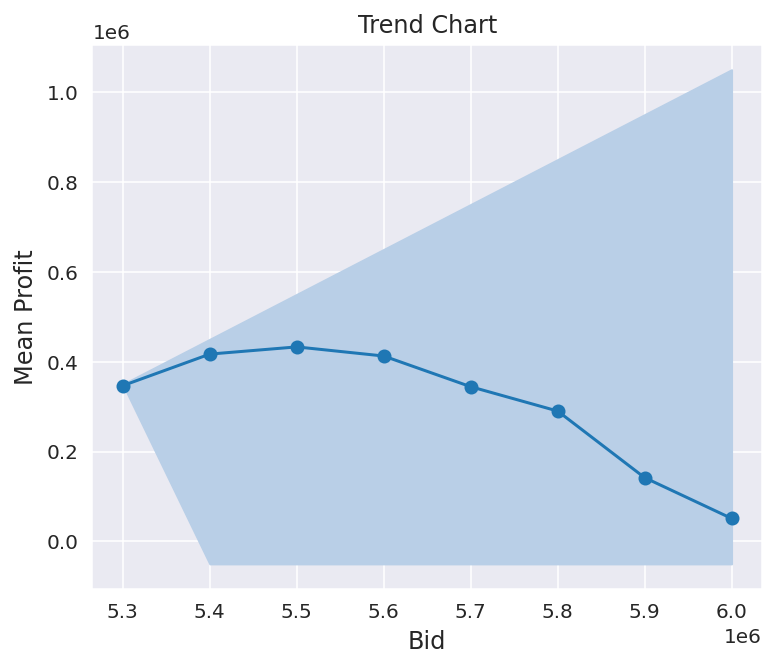

In [6]:
fig, ax = plt.subplots(figsize=(6, 5))
ax.plot('Bid','Profit',data=df, linestyle='-', marker='o');
plt.xlabel('Bid', fontsize=12);
plt.ylabel('Mean Profit', fontsize=12);
plt.title("Trend Chart");
ax.fill_between('Bid','Pctl_05','Pctl_95',data=df,color="#b9cfe7", edgecolor="#b9cfe7");

**HW8.3d** Perform an automated search to find the bid that maximizes RPI’s mean profit. (Use one of the optimization tools we've studied.)

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [7]:
num_sims = 1000
p_cost = 5 # project cost
b_cost = .05 # bid cost
high = 1.4 # high competitor bid
mid = 1.2 # usual competitor bid
low = 1.05 # low competitor bid
comp = 4 # competing bids

# had to modify simulation to output one value
def bidSimulator(bid):
    profit = np.zeros(num_sims)
    wins = 0
    for i in range(num_sims):
        comp_bids = [np.random.triangular(left=p_cost*low, mode=p_cost*mid, right=p_cost*high) for j in range(comp)]
        bids_higher = [bid < comp_bids[j] for j in range(comp)] # bids higher than RPI
        if sum(bids_higher) == comp:
            wins += 1
            profit[i] = bid - (p_cost - b_cost)
        else:
            profit[i] = -b_cost
        #[lower, upper] = np.quantile(profit, [.05, .95])    
    return -np.mean(profit)

result = minimize_scalar(bidSimulator, bounds=(5.3,6.0), method='bounded')
print(f"Maximum profit of ${-result.fun * 1000000:0.2f} found where bid = ${result.x:0.2f} million.")


Maximum profit of $457208.51 found where bid = $5.57 million.


# **HW8.4** - Sausage Making - Simulation with Optimization

We're going to revisit the Sausage Factory problem from Lessons 1 and 2, but this time, we're going to introduce uncertainty.

In Lesson 2, we optimized the cost of our sausage making, by altering the ingredients in each sausage type to meet minimum requirements and fulfill a demand of 350 economy sausages and 500 premium sausages a week.

In reality, our demand fluctuates week to week. 

The basic set up of the problem is the same.

We're going to make sausages by blending pork, wheat, and starch.  Our objective is to minimize the cost of making the sausages.  The table below shows the ingredients available, the cost, and the amount of each ingredient available from our supplier:

Ingredient | Cost ($/kg) | Amount (kg)
-----------|------|--------------
Pork       | 4.32 | 7
Wheat      | 2.46 | 20
Starch     | 1.86 | 17



We want to make 2 types of sausage:
* Economy ( > 40\% pork )
* Premium ( > 60\% pork )

Each sausage is 50 grams (0.05 kg).  

According to government regulations, the most starch we can use in our sausages is 25\% by weight.

**New Information:**

The price for pre-purchased pork is \$3.10, for a discount of \$1.22 per kg. We will be fairly conservative in our estimates of pre-purchase, and we are setting our minimum pork used to our pre-purchased amount, so we will only need to calculate the total discount in our objective, not a penalty for buying overage.  

While our demand fluctuates, we know that our demand for economy sausages is between 325 and 375 each week and our demand for premium sausage is between 450 and 550 each week. Demand appears to be uniformly distributed (use `np.random.randint`).

***This is a prescriptive analytics problem!  You are prescribing the amount of pork to buy under contract to minimize future cost in an uncertain future.***

**HW8.4a** - Write a function that takes in the amount of discount pork we will pre-purchase as a variable (x). 

Inside the function, write a 1000 iteration loop that solves the optimization problem with random variables for demand and x as your stand in for the minimum amount of discount pork produced. Track the amount of full-price pork used and the cost of each iteration and return both from your function.  

You may base your Pyomo model on either the concrete or abstract formulations in Lesson 1 and Lesson 2 presentations, respectively.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [8]:
def simSausage(x):
    
    num_sims=1000
    cost = np.zeros(num_sims)
    pork = np.zeros(num_sims)
    
    for i in range(num_sims):
        
        econ_demand = np.random.randint(325, 376)
        prem_demand = np.random.randint(450, 551)
        
        # Concrete Model
        M = ConcreteModel(name = "Sausages1")

        # Decision Variables
        M.pe = Var(domain = NonNegativeReals)
        M.we = Var(domain = NonNegativeReals)
        M.se = Var(domain = NonNegativeReals)
        M.pp = Var(domain = NonNegativeReals)
        M.wp = Var(domain = NonNegativeReals)
        M.sp = Var(domain = NonNegativeReals)

        # Objective 
        M.cost = Objective( expr = 4.32*(M.pe+M.pp)+2.46*(M.we+M.wp)+1.86*(M.se+M.sp) - (1.22 * x),
                              sense = minimize )

        # Constraints
        M.tot_econ_ct = Constraint( expr = M.pe + M.we + M.se == econ_demand * .05 ) # total kg econ sausages
        M.tot_prem_ct = Constraint( expr = M.pp + M.wp + M.sp == prem_demand * .05 ) # total kg prem sausages
        M.p_prp_econ_ct = Constraint( expr = M.pe >= 0.4*(M.pe + M.we + M.se) ) # econ must be 40% pork
        M.p_prp_prem_ct = Constraint( expr = M.pp >= 0.6*(M.pp + M.wp + M.sp) ) # prem must be 60% pork
        M.s_prp_econ_ct = Constraint( expr = M.se <= 0.25*(M.pe + M.we + M.se) ) # no more than 25% starch
        M.s_prp_prem_ct = Constraint( expr = M.sp <= 0.25*(M.pp + M.wp + M.sp) ) # no more than 25% starch
        M.p_tot_mx_ct = Constraint( expr = M.pe + M.pp <= x+7) # max kg pork available
        M.w_tot_mx_ct = Constraint( expr = M.we + M.wp <= 20 ) # 20 kg wheat available
        M.s_tot_mx_ct = Constraint( expr = M.se + M.sp <= 17 ) # 17 kg starch available
        M.p_tot_mn_ct = Constraint( expr = M.pe + M.pp >= x ) # must use the pork already purchased

        # Solve
        solver = SolverFactory('glpk')
        solver.solve(M)

        cost[i] = M.cost()
        pork[i] = M.pp() + M.pe()
        
    return cost, pork


**HW8.4b** - Test your function, using 20 as your value of x. Plot histograms of the Kilograms of Full-Price Pork purchased and the cost.

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

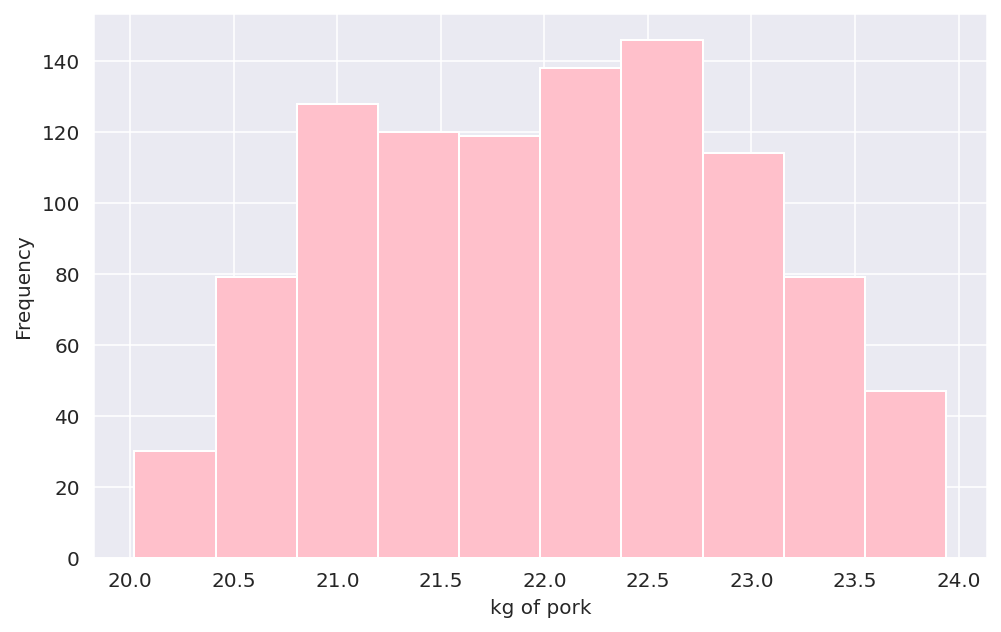

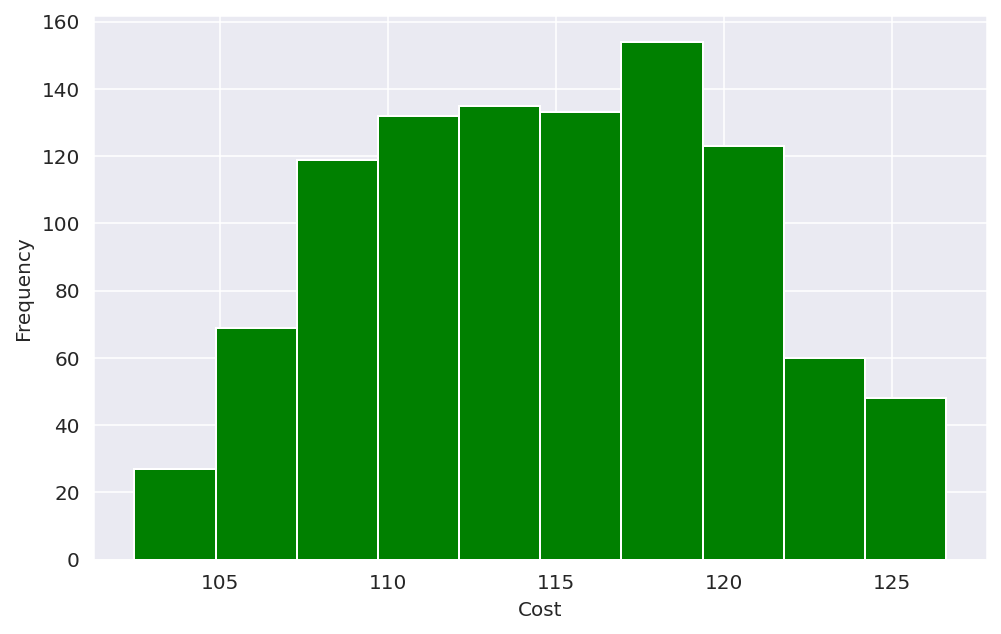

In [9]:
cost, pork = simSausage(20)
plt.figure(figsize=(8,5))
plt.hist(pork, color = 'pink')
plt.ylabel('Frequency')
plt.xlabel('kg of pork')
plt.show()
plt.figure(figsize=(8,5))
plt.hist(cost, color = 'green')
plt.ylabel('Frequency')
plt.xlabel('Cost')
plt.show()

Notice that the final cost and the amount of full-price pork purchased have distributions that fairly closely match each other. That's because full-price pork is the most expensive component of our sausages. The more full-price pork we use, the more expensive our product is. We'd like to optimize the amount of full-price pork we use.

**HW8.4c** - Write a loop to call your function for all the values of pre-order quantities between and including 17 and 28.

Store the values of:

* pre-order quantities
* the mean, 5th percentile and 95th percentile of the overage
* the mean, 5th percentile and 95th percentile of the cost.

After your loop, print the values in a dataframe.

*Note: This may take a while to run.*

<font color = "blue"> *** 4 points -  answer in cell below *** (don't delete this cell) </font>

In [10]:
x_vals = [i for i in range(17, 29)]
pre_order = np.zeros(len(x_vals))
mean_over = np.zeros(len(x_vals))
over_pctl_05 = np.zeros(len(x_vals))
over_pctl_95 = np.zeros(len(x_vals))
mean_cost = np.zeros(len(x_vals))
cost_pctl_05 = np.zeros(len(x_vals))
cost_pctl_95 = np.zeros(len(x_vals))

for i in range(len(x_vals)):
    cost, pork = simSausage(x_vals[i])
    pre_order[i] = x_vals[i]
    mean_over[i] = np.mean(pork)
    [over_pctl_05[i], over_pctl_95[i]] = np.quantile(pork, [.05, .95])
    mean_cost[i] = np.mean(cost)
    [cost_pctl_05[i], cost_pctl_95[i]] = np.quantile(cost, [.05, .95])
    
DF = pd.DataFrame({
    'Pre-Order':pre_order,
    'Overage':mean_over,
    '.05 Overage':over_pctl_05,
    '.95 Overage':over_pctl_95,
    'Cost':mean_cost,
    '.05 Cost':cost_pctl_05,
    '.95 Cost':cost_pctl_95,
})
print(DF)

    Pre-Order  Overage  .05 Overage  .95 Overage   Cost  .05 Cost  .95 Cost
0       17.00    22.03        20.46        23.48 118.56    108.97    127.31
1       18.00    22.03        20.58        23.47 117.32    108.67    126.11
2       19.00    21.99        20.52        23.47 115.89    107.05    124.70
3       20.00    21.99        20.53        23.46 114.62    105.69    123.61
4       21.00    22.11        21.00        23.55 113.87    105.37    122.73
5       22.00    22.43        22.00        23.50 113.33    106.25    121.32
6       23.00    23.05        23.00        23.47 112.89    106.77    119.84
7       24.00    24.00        24.00        24.00 113.40    107.41    119.55
8       25.00    25.00        25.00        25.00 114.03    108.28    120.18
9       26.00    26.00        26.00        26.00 114.71    108.35    120.94
10      27.00    27.00        27.00        27.00 115.37    109.10    121.58
11      28.00    28.00        28.00        28.00 116.22    110.09    122.45


**HW8.4d** - Using the Freddie the Newsboy Simulation code, plot a trend chart that shows the cost by kilograms of pre-purchased pork. 

Using the trend chart and the output from your dataframe, write a short summary explaining how much pre-purchased discount pork we should buy each week and why.

<font color = "blue"> *** 4 points -  answer in cells below *** (don't delete this cell) </font>

<font color = "green">
The minimum cost occurs when 22 kg of pre-purchased pork is ordered each week. 
</font>

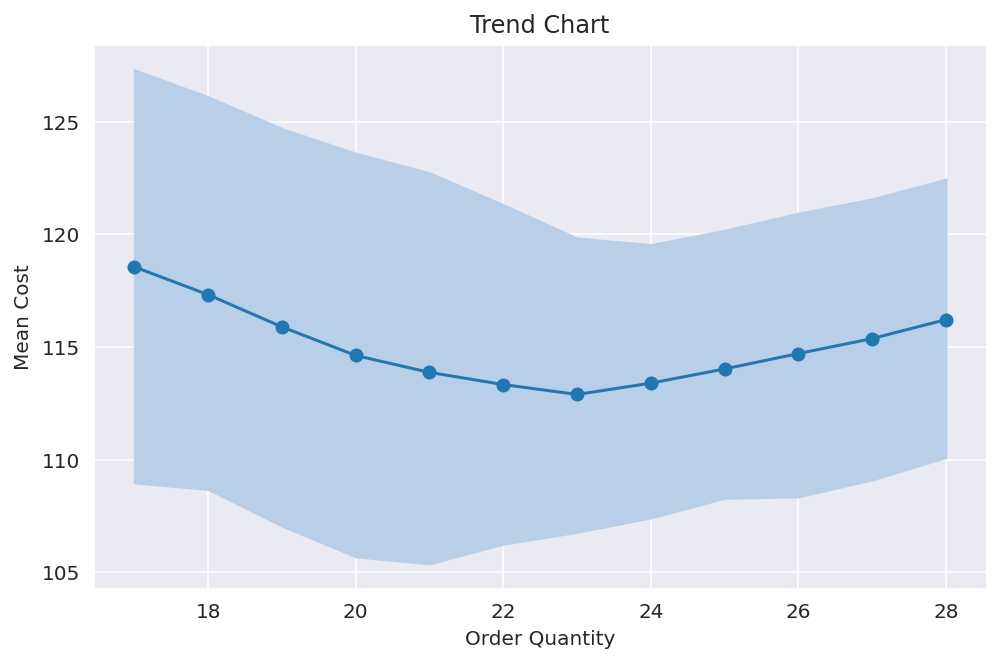

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot('Pre-Order','Cost',data=DF, linestyle='-', marker='o');
plt.xlabel('Order Quantity', fontsize=10);
plt.ylabel('Mean Cost', fontsize=10);
plt.title("Trend Chart");
ax.fill_between('Pre-Order','.05 Cost','.95 Cost',data=DF,color="#b9cfe7", edgecolor="#b9cfe7");